In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


from Lineaire.Linear import *
from Loss.BCELoss import BCELoss
from Activation.Tanh import Tanh
from Activation.Sigmoide import Sigmoide
from Activation.ReLu import ReLU
from Encapsulation.AutoEncodeur import AutoEncodeur
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD
from Activation.SoftMax import  SoftMax
from Loss.CELogSoftMax import CELogSoftMax
from Loss.CELoss import CELoss

from convolution import *

from outils import tools
from Encapsulation import fonctions as fn

from icecream import ic


In [8]:
def onehot(y):
    onehot = np.zeros((y.size,y.max()+1))
    onehot[np.arange(y.size),y]=1
    return onehot

uspsdatatrain = "C:/_TME\Projet-ML/dataset/USPS_train.txt"
uspsdatatest = "C:/_TME\Projet-ML/dataset/USPS_test.txt" 

nb_train = 1100
nb_test = 500

alltrainx, alltrainy = tools.load_usps(uspsdatatrain)
alltestx, alltesty = tools.load_usps(uspsdatatest)
alltrainx, alltrainy = alltrainx[:nb_train],alltrainy[:nb_train]
alltestx, alltesty = alltestx[:nb_test],alltesty[:nb_test]
# taille couche
input = len(alltrainx[0])
out = len(np.unique(alltesty))
alltrainy = onehot(alltrainy)
alltesty= onehot(alltesty)
alltrainx = alltrainx.reshape(alltrainx.shape[0], alltrainx.shape[1], 1)
alltestx = alltestx.reshape(alltestx.shape[0], alltestx.shape[1], 1)



In [9]:
iteration = 100
gradient_step = 1e-3


net = Sequentiel(*[Conv1D(3, 1, 32, stride=1),
                      MaxPool1D(2, 2),
                      Flatten(),
                      Linear(4064, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ]) 

loss_ce = CELoss()


In [10]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=1, loss=loss_ce, nb_epochs=iteration, shuffle=True)


ic| X.shape: (1100, 256, 1)
ic| Y.shape: (1100, 10)
100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


Le score d'accuracy en train =  0.5727272727272728
Le score d'accuracy en train =  0.574


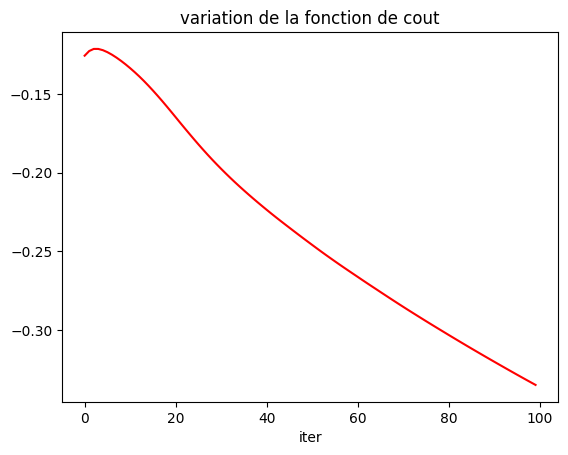

In [11]:
plt.plot(np.arange(len(couts)),couts,color='red',label="la function de cout")
plt.xlabel("iter")
plt.title("variation de la fonction de cout")
plt.savefig("loss_convolution_100it_1,1ktr_0.5ktst.png")
plt.show()


# with open('net_trained.pkl', 'wb') as f:
#     pickle.dump(net, f)


# with open('net_trained.pkl', 'rb') as f:
#     net=pickle.load(f)


_, alltrainy = tools.load_usps(uspsdatatrain)
_, alltesty = tools.load_usps(uspsdatatest)

alltrainy = alltrainy[:nb_train]
alltesty = alltesty[:nb_test]

predict = net.forward(alltrainx)
# print((np.where(predict == alltrainy, 1, 0)).mean() )
score_train = fn.score(alltrainy,predict)
print("Le score d'accuracy en train = ", score_train)

predict = net.forward(alltestx)
score_test = fn.score(alltesty,predict)
print("Le score d'accuracy en train = ", score_test)

